<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#预测误差" data-toc-modified-id="预测误差-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>预测误差</a></span><ul class="toc-item"><li><span><a href="#不可约误差:" data-toc-modified-id="不可约误差:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>不可约误差:</a></span></li><li><span><a href="#偏差" data-toc-modified-id="偏差-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>偏差</a></span></li><li><span><a href="#方差" data-toc-modified-id="方差-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>方差</a></span></li><li><span><a href="#预测误差分解" data-toc-modified-id="预测误差分解-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>预测误差分解</a></span></li></ul></li><li><span><a href="#线性回归" data-toc-modified-id="线性回归-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>线性回归</a></span><ul class="toc-item"><li><span><a href="#偏差" data-toc-modified-id="偏差-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>偏差</a></span><ul class="toc-item"><li><span><a href="#$f(x)$是线性函数" data-toc-modified-id="$f(x)$是线性函数-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>$f(x)$是线性函数</a></span></li><li><span><a href="#$f(x)$不是线性函数" data-toc-modified-id="$f(x)$不是线性函数-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>$f(x)$不是线性函数</a></span></li></ul></li><li><span><a href="#方差" data-toc-modified-id="方差-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>方差</a></span><ul class="toc-item"><li><span><a href="#$f(x)$是线性函数" data-toc-modified-id="$f(x)$是线性函数-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>$f(x)$是线性函数</a></span></li><li><span><a href="#$f(x)$不是线性函数" data-toc-modified-id="$f(x)$不是线性函数-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>$f(x)$不是线性函数</a></span></li></ul></li><li><span><a href="#实验" data-toc-modified-id="实验-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>实验</a></span><ul class="toc-item"><li><span><a href="#数据" data-toc-modified-id="数据-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>数据</a></span></li><li><span><a href="#f(x)-是线性函数" data-toc-modified-id="f(x)-是线性函数-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>f(x) 是线性函数</a></span></li><li><span><a href="#f(x)-不是线性函数" data-toc-modified-id="f(x)-不是线性函数-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>f(x) 不是线性函数</a></span></li></ul></li></ul></li><li><span><a href="#Ridge-regression" data-toc-modified-id="Ridge-regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ridge regression</a></span><ul class="toc-item"><li><span><a href="#The-variance" data-toc-modified-id="The-variance-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>The variance</a></span></li><li><span><a href="#The-bias" data-toc-modified-id="The-bias-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>The bias</a></span></li><li><span><a href="#Best-$\lambda$" data-toc-modified-id="Best-$\lambda$-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Best $\lambda$</a></span></li></ul></li><li><span><a href="#Principal-component-regression" data-toc-modified-id="Principal-component-regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Principal component regression</a></span></li><li><span><a href="#Set-the-lambda-as-the-optimal" data-toc-modified-id="Set-the-lambda-as-the-optimal-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Set the lambda as the optimal</a></span></li></ul></div>

# 预测误差

## 不可约误差:
     
设 $y_i = f(x_i) + \epsilon_i$，即使准确得到函数$f(x)$，那么某一个测试集上依然有误差

$$
\sum_i (f(x'_i) - y_i)^2 = \sum_i \epsilon_i^2
$$

其期望为
$$
\sum_i \sigma_i^2
$$


## 偏差
无穷多训练集训练的无穷多模型，对的测试集上$x'_i$的平均预测为$E[y(x'_i)]$，则偏差为

$$
\sum_i (f(x_i') - E[y(x'_i)])^2
$$

存在偏差有两种因素，第一种为拟合所用的函数不能包含$f(x)$（例如，使用一次函数去拟合二次函数），第二种为尽管拟合函数的函数空间包含$f(x)$，但是函数的参数估计不准确。第一种因素导致的偏差称为模型偏差，第二种因素导致的偏差称为估计偏差。

线性模型的模型偏差，即
$$\min_\beta E_{test}[\sum_i (x_i'\beta - f(x_i'))^2 ]$$
顺便我们定义
$$\beta^* = \arg \min_\beta E_{test}[ \sum_i (f(x_i) - x_i\beta)^2] $$
$$y_l^*(x) = x \beta^*$$

估计偏差

$$\sum_i (E[y_l(x'_i)] - y_l^*(x'_i))^2$$

注意总偏差还存在着 估计偏差和模型偏差的关联项。




## 方差

某一个训练集的的训练结果为$y(x_i)$，则方差可以表示为
$$
\sum_i (y_l(x_i') - E[y_l(x'_i)])^2
$$


## 预测误差分解

测试误差为

$$
\sum_i (y_l(x'_i) - y_i)^2
=
\sum_i (y_l(x'_i) - E[y_l(x'_i)] + E[y_l(x'_i)] - f + f - y_i)^2
$$

无穷测试集和无穷训练集的双重期望为

$$
E_{train, test}[\sum_i (y_l(x'_i) - y_i)^2]
=
E_{train}[\sum_i (y_l(x'_i) - E[y_l(x'_i)])^2] + 
\sum_i (E[y_l(x'_i)] -f)^2 + \sum_i \sigma_i^2
$$


预测误差为 = 不可约误差 $\oplus$  偏差 $\oplus$ 方差

# 线性回归

## 偏差

设训练集合为$X$，则$\beta$由下式给出

$$
\beta = (X^T X)^{-1} X^T y
$$

其期望为
$$
E[\beta] = E_X[(X^T X)^{-1} X^T E_{y|X}[y] ]
$$

其中
$$E_X[.] = \int dX P(X) . $$
$$E_{y|X}[.] = \int dy P(y|X) . $$


###  $f(x)$是线性函数
当$f(x)$是线性函数（且$X^TX$非奇异矩阵），且系数为$\beta_{truth}$，则$E_{y|X}[y] = X\beta_{truth}$，显然
$$
E[\beta] = E_X[(X^T X)^{-1} X^T X \beta_{truth}] = E_X[\beta_{truth}] =\beta_{truth}
$$
也就是说，也就是训练结果无偏的（既不存在模型偏差也不存在估计误差），且这个结论与$X$的分布无关。

### $f(x)$不是线性函数
如果$f(x)$不是线性函数，则训练结果一般是有偏的（至少存在模型误差，也可能存在参数估计偏差）。

## 方差

对于测试集数据 $X'$, 其预测为 
$$
\hat{y}' = y_l(X') = X' (X^T X)^{-1} X^T y
$$
涨落存在于$X$和$y$。方差为
$$
\text{variance} = E_{X}\left[E_{y|X}\left[\sum_i (\hat{y}_i'-E[y_l(x'_i)])^2\right] \right]
=
E_{X} \left[\sum_i \text{Var}_{y|X}(\hat{y}'_i) +  \sum_i (E_{y|X}[y_l(x'_i)]-E[y_l(x'_i)])^2 \right]
$$

###  $f(x)$是线性函数


我们已经证明了
$$
E[y_l(x_i)] = E_{y|X}[y_l(x_i)]
$$
于是
$$
\text{variance} = E_{X}\left[ \sum_i \text{Var}_{y|X}[y'_i] \right]
$$

$$
\text{Var}_{y|X}(y') = \sum_i {\text{Var}_{y|X}(y_i')}  = \text{E}_{y|X}  [\epsilon^T  X   (X^T X)^{-1} {X'}^T  X' (X^T X)^{-1} X^T \epsilon]
$$

$$
\text{Var}_{y|X}(y') = \text{E}_{y|X}[\text{Tr}( X   (X^T X)^{-1} {X'}^T  X' (X^T X)^{-1} X^T \epsilon \epsilon^T)]
$$

我们假设$E_{y|X}[\epsilon_i\epsilon_j]=\delta_{ij}\sigma^2_i$

$$
\text{Var}_{y|X}(y') = \text{Tr}( X   (X^T X)^{-1} {X'}^T  X' (X^T X)^{-1} X^T \text{diag}(\sigma^2))
$$
其中$\sigma=(\sigma_0,\sigma_1,...\sigma_N)$。

我们假设$X'^T X' = \frac{N'}{N} X^T X$
$$
\text{Var}_{y|X}(y') = \frac{N^\prime}{N} \text{Tr}( X (X^T X)^{-1} {X}^T\text{diag}(\sigma^2))
$$

对X进行SVD分解
$$
X = U \Sigma V^T
$$
则
$$
\text{Var}_{y|X}(y') = \frac{N^\prime}{N} \sum_{0\leq i<\text{df}} (U^T \text{diag}(\sigma^2) U)_{ii}
$$

df为自由度等于特征数量加一。

如果对于任意$i,j$有$\sigma_i=\sigma_j$，则
$$
\text{Var}_{y|X}(y') = \sigma\frac{N^\prime}{N} \text{df}
$$
上式与$X$无关，于是
$$
\text{Var}(y') = \sigma\frac{N^\prime}{N} \text{df}
$$

实际上我们不能预先知道$\sigma$，只能从数据中估计。
于是可以估计方差为
$$
\text{Var}_{y|X}(y') = \frac{N^\prime}{N} \sum_{0\leq i<\text{df}} (U^T \text{diag}((y - \hat{y})^2) U)_{ii}
$$



### $f(x)$不是线性函数

对于$\sum_i \text{Var}_{y|X}[y'_i]$ 计算依然全部成立，但是除了这一项还多出来一项。

$$
\text{variance}
=
E_{X} \left[\sum_i \text{Var}_{y|X}(\hat{y}'_i) +  \sum_i (E_{y|X}[y_l(x'_i)]-E[y_l(x'_i)])^2 \right]
$$

## 实验

### 数据

* Input dimension (features):2
* $y =  x_1  + \epsilon$, $x_1 \in [0,1]$, $x_2 \in [0,2]$
* $\epsilon$ is following the uniform distribution $[-3/2,3/2]$

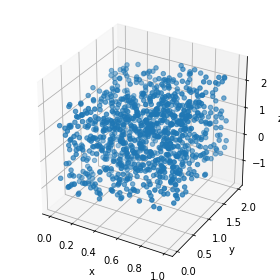

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

%matplotlib inline

x1_max = 1
x2_max = 2

def f_default(X):
    return X[:,0]

N_train_default = 1000
sigma_default = 1

def get_train(N=N_train_default, X_train=None, f=f_default, sigma=sigma_default):
    if X_train is None:
        X_train = np.random.rand(N, 2)
        X_train[:,0] = X_train[:,0] * x1_max
        X_train[:,1] = X_train[:,1] * x2_max

    rnd_max = np.sqrt(12) * sigma
    y_train = f(X_train) + rnd_max*(np.random.rand(np.shape(X_train)[0]) - 0.5)
    return X_train, y_train

X_train, y_train = get_train()
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1, projection="3d")
ax.scatter(X_train[:,0], X_train[:,1], y_train)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.tight_layout()
plt.show()

### f(x) 是线性函数

In [39]:
from sklearn.linear_model import LinearRegression

def get_test(sigma=sigma_default, f=f_default):
    x1_dense = np.linspace(0, x1_max, 100)
    x2_dense = np.linspace(0, x2_max, 100)
    XX,YY = np.meshgrid(x1_dense, x2_dense)
    X_test = np.c_[XX.ravel(), YY.ravel()]
    y_test_truth = f(X_test)
    rnd_max = np.sqrt(12) * sigma
    
    y_test = y_test_truth + rnd_max*(np.random.rand(100*100*1000) - 0.5).reshape(1000,10000)
    return X_test, y_test, y_test_truth


def show(numbers):
    from IPython.display import display
    import pandas as pd
    df = pd.DataFrame(columns=["",""], data=numbers)
    display(df)


def f241(X):
    return X[:,0]


def simulate(f):
    
    sigma = sigma_default
    X_test, y_test, y_test_truth = get_test(f=f)
    yhat_test = []
    yhat_train = []
    covs_estimate = []
    for i in range(1000):
        X_train, y_train = get_train(f=f)
        
        N_train = np.shape(X_train)[0]
        
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        
        
        U,S,VT = np.linalg.svd(X_train, full_matrices=False)
        yhat_train_ = lr.predict(X_train)
        
        UTyyU = (U.T * (y_train - yhat_train_)**2).dot(U)

        lastUTy = (1/np.sqrt(N_train) * (y_train - yhat_train_)**2 * 1/np.sqrt(N_train)).sum()
        
        cov_estimate = np.sqrt( (UTyyU.trace() + lastUTy)/N_train )
        covs_estimate.append(cov_estimate)
        
        yhat_test.append( lr.predict(X_test) )
        yhat_train.append( yhat_train_ )
        
        
    yhat_train = np.array(yhat_train)
    yhat_test = np.array(yhat_test)
    covs_estimate = np.array(covs_estimate)
    
    N_test = np.shape(y_test)[0]
    
    # expect over N_repeat
    err = yhat_test - y_test_truth
 
    prediction_error = np.sqrt(np.square(yhat_test - y_test).mean())
    irreduceble_error = np.sqrt(np.square(y_test - y_test_truth).mean())
    average_prediction_error  = np.sqrt(np.square(err).mean(axis=1).mean())

    bias = np.sqrt(np.square(err.mean(axis=0)).mean())
    std = np.sqrt(err.var(axis=0).mean())

    lr = LinearRegression()
    lr.fit(X_test, y_test_truth)
    yhat_test_truth = lr.predict(X_test)
    model_bias = np.sqrt(np.square(y_test_truth - yhat_test_truth).mean())    
    estimation_bias = np.sqrt(np.square((yhat_test - yhat_test_truth).mean(axis=0)).mean())
    
    
    numbers=[]
    numbers.append(["#test", int(N_test)])
    numbers.append(["#train", int(N_train)])
    numbers.append(["Prediction error", prediction_error])
    numbers.append(["Irreducible error", irreduceble_error])
    numbers.append(["Error compared to truth", average_prediction_error])
    numbers.append(["Irreducible error + Error compared to truth", (irreduceble_error**2 + average_prediction_error**2)**0.5])
    
    numbers.append(["Bias", bias])
    numbers.append(["Model bias", model_bias])
    numbers.append(["Estimation bias",  estimation_bias])
    numbers.append(["Root of variance", std])
    numbers.append(["Bias + Root of variance",  (bias**2 +  std**2)**0.5])

    numbers.append(["Irreducible error (theory)", sigma])    
    correct_factor = 1
    numbers.append(["Root of variance (theory)",  sigma* np.sqrt(correct_factor*3/N_train)])
    numbers.append(["Root of variance (estimation from data)",  covs_estimate.mean()])

    return numbers


    
show(simulate(f241))

,,
0,#test,1.000000e+03
1,#train,1.000000e+03
2,Prediction error,1.001401e+00
3,Irreducible error,9.999273e-01
4,Error compared to truth,5.445683e-02
5,Irreducible error + Error compared to truth,1.001409e+00
6,Bias,1.037163e-03
7,Model bias,1.130604e-15
8,Estimation bias,1.037163e-03
9,Root of variance,5.444695e-02


### f(x) 不是线性函数

In [43]:
def f233(X):
    return X[:,0] - 0.3*X[:,1]**2
    
show(simulate(f233))

,,
0,#test,1000.000000
1,#train,1000.000000
2,Prediction error,1.005816
3,Irreducible error,1.000065
4,Error compared to truth,0.107542
5,Irreducible error + Error compared to truth,1.005830
6,Bias,0.091275
7,Model bias,0.091236
8,Estimation bias,0.002674
9,Root of variance,0.056869


# Ridge regression
## The variance
In the ridge regression we firstly center the $X$ with $\overline{X}$.
In the following we will only use the variables after centering.
 $\beta$ is given by
$$
\beta = (X^T X + \lambda I)^{-1} X^T y
$$

For the test data $X'$ (centered with $\overline{X}$), the prediction is 
$$
y' = X' (X^T X + \lambda I)^{-1} X^T y + \frac{1}{N} \mathbf{1} y
$$

The fluctuation is from $y$.
If the test data and the tranning data $X$ have the same mean and variance, and SVD decomposition of $X$ is $X = U \Sigma V^T$, then

$$
\text{Var}(y'_\beta) = 
\sigma^2_\epsilon\frac{N^\prime}{N} \sum_i \left(\frac{d_i^2}{d_i^2 + \lambda}\right)^2 
$$

$$
\text{Var}{y'_b} = \sigma^2_\epsilon  \frac{N^\prime}{N} 
$$
the correlation term is 
$$
\text{Var}{y'_{b\beta}} = 0
$$


df' is effective the degree of freedoms (not same as the definition in the most text book, so we use a prime to distinguish them). $N'$ is the number of testing data. and $N$ is the number of tranning data.
It's obviously, increasing the $\lambda$ will reduce the df' and the variance.




## The bias

The $lambda$ will introduce bias. We can only estimate bias from the linear regression.

$$
\delta y' = X' ((X^T X + \lambda I)^{-1} - (X^T X)^{-1})  X^T y
$$

$$
\sum_j |\delta y'_j|^2 = Tr\left[(X' ((X^T X + \lambda I)^{-1} - (X^T X)^{-1})  X^T y)^{T} X' ((X^T X + \lambda I)^{-1} - (X^T X)^{-1})  X^T y\right]
$$

$$
\sum_j |\delta y'_j|^2 = Tr\left[  y^T X   (X^T X + \lambda I)^{-1} - (X^T X)^{-1}) X'^T X' ((X^T X + \lambda I)^{-1} - (X^T X)^{-1})  X^T y\right]
$$

If the test data and the tranning data $X$ have the same mean and variance, and SVD decomposition of $X$ is $X = U \Sigma V^T$, then

$$
\sum_j |\delta y'_j|^2 = \frac{N^\prime}{N} Tr\left[  y^T X  V ((\Sigma^T\Sigma + \lambda I)^{-1} - (\Sigma^T\Sigma)^{-1}) \Sigma^T\Sigma ((\Sigma^T\Sigma + \lambda I)^{-1} - (\Sigma^T\Sigma)^{-1}) V^T X^T y\right]
$$


$$
\sum_j |\delta y'_j|^2 = \frac{N^\prime}{N} Tr\left[  y^T U \text{diag}(\lambda^2 /(d_i^2 + \lambda)^2) U^T y\right]
$$
$$
\sum_j |\delta y'_j|^2 = \frac{N^\prime}{N} \sum_{i<p} \left(\frac{ \lambda }{d_i^2 + \lambda}\right)^2 (U^T y)_i^2
$$


## Best $\lambda$

we found for singular value $d_i$ the optimal value is at 
$$
\lambda_i = d_i^2\frac{\sigma_\epsilon^2}{(U^T y)_i^2} = \sigma_\epsilon^2/({\rm slope\,of\,ith\,component})
$$

and the minimum is 
$$
\sum_j |\delta y'_j|^2 = \frac{N^\prime}{N}\sum_i \frac{\sigma_\epsilon^2 (U^T y)_i^2} { \sigma_\epsilon^2 + (U^T y)_i^2}
$$


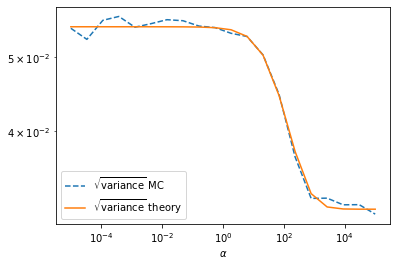

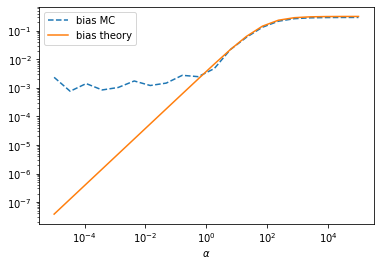

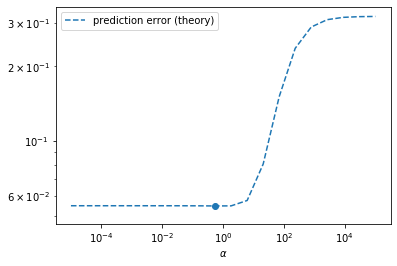

min  5.5E-02


In [4]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt


N_repeat = 1000
N_test = 100*100
N_train=1000
X_test, y_test, y_test_truth = get_test()
X_train, y_train = get_train(N_train)

bias_ = []
std_ = []
std_theory = []
bias_theory = []

lambs = np.power(10, np.linspace(-5, 5, 20))

X_train_ = X_train - X_train.mean(axis=0)
y_train_ = y_train - y_train.mean()
y_train_truth = f_default(X_train)
y_train_truth_ = y_train_truth - y_train_truth.mean()

U,S,VT = np.linalg.svd(X_train_)

UTy = U[:,:2].T.dot(y_train_)

# should be same
#print(  S )
#print( UTy )
#print(  (UTy**2).sum() )
#print(  ( y_train_truth_ **2).sum() )


for lamb in lambs:
    yhat = np.zeros((N_repeat, N_test))
    for i in range(N_repeat):
        X_train, y_train = get_train(X_train=X_train)
        #print(X_train)
        lr = Ridge(alpha=lamb)
        lr.fit(X_train, y_train)
        yhat[i,:] = lr.predict(X_test)


    err = yhat - y_test_truth
    bias = np.sqrt(  (err.mean(axis=0)**2).mean()  )
    std = np.sqrt(err.var(axis=0).mean())
    bias_.append(bias)
    std_.append(std)

    df = ( (S**2/(S**2 + lamb))**2 ).sum()

    std_theory.append(sigma_default * np.sqrt(   (df+1)/N_train   ))

    bias_theory.append(np.sqrt(  1/N_train *  (lamb**2/(S**2 + lamb)**2  *  UTy**2).sum()   ))




plt.plot(lambs, std_, label=r"$\sqrt{{\rm variance}}$ MC", linestyle="--")
plt.plot(lambs, std_theory, label=r"$\sqrt{{\rm variance}}$ theory")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel(r"$\alpha$")
plt.show()

plt.plot(lambs, bias_, label="bias MC", linestyle="--")
plt.plot(lambs, bias_theory, label="bias theory")
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\alpha$")
plt.legend()
plt.show()

total = (np.array(std_theory)**2 + np.array(bias_theory)**2)**0.5
argmin = np.argmin(total)

plt.plot(lambs, total, label=r"prediction error (theory)", linestyle="--")
plt.scatter([lambs[argmin]], [total[argmin]])
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\alpha$")
plt.legend()
plt.show()

print("min % .1E"%total[argmin])


# Principal component regression

Let's assume $U^T \overline{y}$

$$
E[(U^T y)_i^2] = E[(U^T \epsilon)_i^2] = \sigma_\epsilon^2
$$


we can not really expect to find a component that $(U^Ty)_i \ll \sigma_\epsilon$.

Note for component $i$, the minimum variance is
$$
\frac{\sigma_c^2 (U^Ty)_i^2 }{ \sigma_c^2 + (U^Ty)_i^2   }
$$

So you can't effective reduce the variance without introduce new bias.

In this example, we are theating, we don't observe $U^T y \ll \sigma_\epsilon$, but we turn off the first component ($y$ axis), we know this will not introduce big bias (generally you can't). finally we obtain better result for many tranning data. but should not do the same in realy word data analysis.


In [5]:
def simulate(lambs=[1E10,0], seed=0, sigma=sigma_default):
    
    np.random.seed(seed)
    N_repeat = 1000
    N_test = 100*100
    N_train=1000
    X_test, y_test, y_test_truth = get_test()
    X_train, y_train = get_train(N_train)

    yhat = np.zeros((N_repeat, N_test))


    X_train_ = X_train - X_train.mean(axis=0)
    y_train_ = y_train - y_train.mean()

    U,S,VT = np.linalg.svd(X_train_, full_matrices=False)
    UTy = U[:,:2].T.dot(y_train_)
    
    lambs_ = lambs
    if lambs_ is None:
        lambs_ = (sigma* S / UTy)**2
        
    S2inv = 1/(S*S+lambs_)


    for i in range(N_repeat):
        
        X_train, y_train = get_train(X_train=X_train)
        y_train_ = y_train - y_train.mean()

        beta =   VT.T.dot(  S2inv * S * U.T.dot(y_train_) )
        b = y_train.mean() - X_train.mean(axis=0).dot(beta)

        yhat[i,:] = X_test.dot(beta) + b



    N_test = np.shape(y_test)[0]
    N_train = np.shape(X_train)[0]

    # expect over N_repeat
    err = yhat - y_test_truth
    irreduceble_error = (y_test - y_test_truth).std()
    average_prediction_error  = np.sqrt(np.square(err).mean(axis=1).mean())


    bias = np.sqrt(np.square(err.mean(axis=0)).mean())
    std = np.sqrt(err.var(axis=0).mean())


    X_train_ = X_train - X_train.mean(axis=0)
    y_train_ = y_train - y_train.mean(axis=0)


    numbers=[]
    numbers.append(["Irreducible error (theory)", sigma])
    numbers.append(["Irreducible error (MC)", irreduceble_error])
    numbers.append(["Error compared to truth", average_prediction_error])
    numbers.append(["Bias", bias])
    numbers.append(["Model bias", 0.0])
    numbers.append(["Estimation bias",  bias])
    numbers.append(["Root of variance", std])
    numbers.append(["Bias + Root of variance",  (bias**2 +  std**2)**0.5])


    numbers.append(["UTy",  UTy])
    numbers.append(["sigma",  sigma])
    numbers.append(["lambda",  lambs_ ])
    numbers.append(["minimum variance",  np.sqrt(sigma**2 * UTy**2/(UTy**2 + sigma**2)) ])
    
    numbers.append(["Root of variance (theory)",  np.sqrt((sigma**2 * UTy**2/(UTy**2 + sigma**2)).sum() + sigma**2)/np.sqrt(N_train)  ])
    numbers.append(["Bias (theory)",  np.sqrt(1/N_train * (UTy**2 * (lambs_/(lambs_+S**2))**2).sum()    )])


    show(numbers)

simulate([1E10,0])

,,
0,Irreducible error (theory),1
1,Irreducible error (MC),0.999988
2,Error compared to truth,0.0455489
3,Bias,0.00275834
4,Model bias,0
5,Estimation bias,0.00275834
6,Root of variance,0.0454653
7,Bias + Root of variance,0.0455489
8,UTy,"[1.7920584241648034, 7.967260090629146]"
9,sigma,1


# Set the lambda as the optimal

In [6]:
simulate(None)

,,
0,Irreducible error (theory),1
1,Irreducible error (MC),0.999988
2,Error compared to truth,0.0516434
3,Bias,0.00672075
4,Model bias,0
5,Estimation bias,0.00672075
6,Root of variance,0.0512042
7,Bias + Root of variance,0.0516434
8,UTy,"[1.7920584241648034, 7.967260090629146]"
9,sigma,1
